## 1. Probability density functions
So far, we have talked about probabilities of `discrete quantities`, such as die rolls and number of bus arrivals, but what about `continuous quantities`?
### 1.1. Theory.
#### Continuous variables
A continuous quantity can take on any value, not just discrete ones. For example, the speed of a train can be 45-point-76 km/h.
#### Michelson's speed of light experiment
- Continuous variables also have probability distributions. Let's consider an example. In 1879, Albert Michelson performed 100 measurements of the speed of light in air.
- Each measurement has some error in it; conditions, such as temperature, humidity, alignment of his optics, et cetera, change from measurement to measurement. As a result, any fractional value of the measured speed of light is possible, so it is apt to describe the results with a continuous probability distribution. 
- In looking at Michelson's numbers, shown here in units of megameters/s, or 1000s of kilometers/s, we see this is indeed the case. What probability distribution describes these data? I posit that these data follow the famous Normal distribution. 

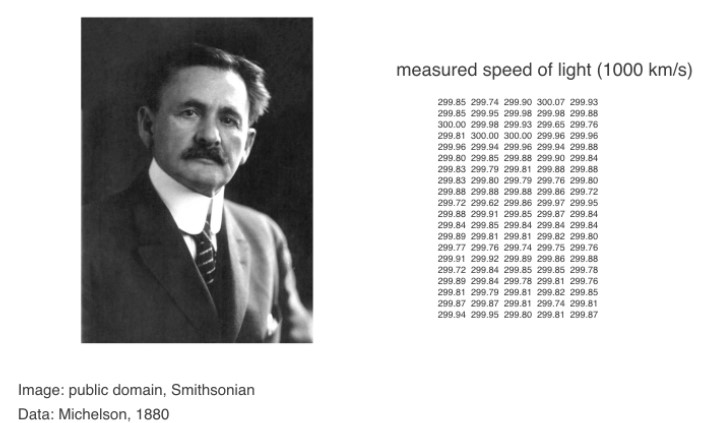

In [3]:
from IPython.display import Image
## Hình minh họa Image(fig1, height, width)

#### Probability density function (PDF)
- To understand what the Normal distribution is, let's consider its probability density function, or PDF. This is the continuous analog to the probability mass function, the PMF. 
- It describes the chances of observing a value of a continuous variable. The probability of observing a single value of the speed of light does not make sense, because there is an infinity of numbers, say between 299-point-6 and 300-point-0 megameters per second. Instead, areas under the PDF give probabilities. 
- So, the probability of measuring that the speed of light is greater than 300,000 km/s is an area under the normal curve. 

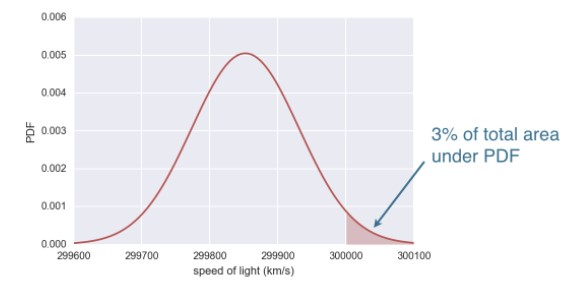

In [4]:
## Hình minh họa Image(fig1, height, width)

- Parametrizing the PDF based on Michelson's experiments, this is about a 3% chance, since the pink region is about 3% of the total area under the PDF. To do this calculation, we were really just looking at the `cumulative distribution function`, or CDF, of the Normal distribution. 

#### Normal CDF.
- Remember that the CDF gives the probability the measured speed of light will be less than the value on the x-axis. So, reading off the value at 300,000 km/s, we see that there is a 97% chance that a speed of light measurement is less than that. 
- So, there is about a 3% change it is greater.

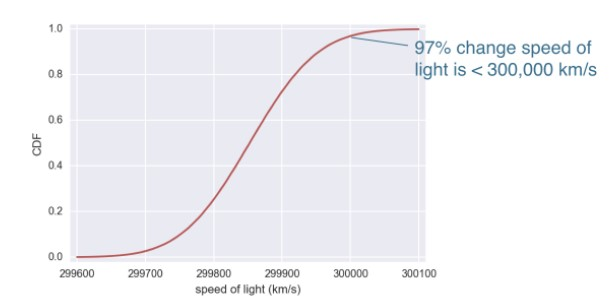

In [5]:
## Hình minh họa Image(fig1, height, width)

### 1.2. PRACTICES.
#### Exercise 1.2.1. Interpreting PDFs
Consider the PDF shown bellow. Which of the following is true?
>- A. $x$ is more likely to be less than 10 than to be greater than 10.
>- B. $x$ is more likely to be greater than 10 than to be less than 10.
>- C. $x$ We cannot tell from the PDF if  is more likely to be greater than or less than 10.
>- D. $x$ This is not a valid `PDF` because it has two peaks.

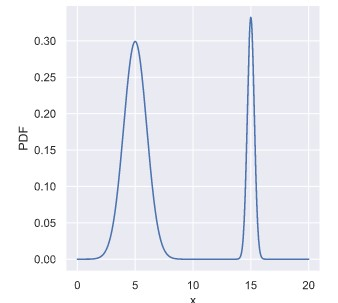

In [6]:
## Hình minh họa Image(fig1, height, width)

#### Answers & explaination
>- **A. Correct!!** The probability is given by the area under the PDF, and there is more area to the left of 10 than to the right.
>- B, C. Incorrect! Remember, probability is given by the area under the `*PDF`, not the value of the `PDF`.
>- D. Incorrect! A PDF can have any shape. It just has to be singularly-valued, nonnegative, and the total area under the PDF must be equal to one.

#### Exercise 1.2.2. Interpreting CDFs
At right is the CDF corresponding to the PDF you considered in the last exercise. Using the CDF, what is the probability that $x$ is greater than 10? 
>- A. 0.25
>- B. 0.75
>- C. 3.75
>- D. 15

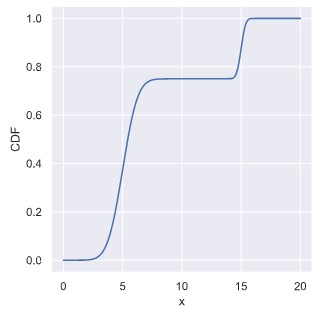

In [7]:
## Hình minh họa Image(fig1, height, width)

#### Answers & explaination
>- **A. Correct!** The value of the CDF at `x = 10` is `0.75`, so the probability that `x < 10` is `0.75`. Hence, the probability that `x > 10` is `0.25`.
>- B. Incorrect. Remember, that if the value of the CDF is 0.75 at x = 10, then the probability that x is less than 10 is 0.75.
>- C. Incorrect. For a CDF, probability is not given by the area under the curve.
>- D. Incorrect. Remember, probabilities must be between zero and one.

## 2. Introduction to the Normal distribution
The `Normal distribution` is famous, and we just used it as an example to learn about continuous distributions. We will not go into the story of the `Normal distribution` in depth, but for the purposes of this course, it suffices to say that it describes a continuous variable whose PDF is symmetric and has a single peak.
### 2.1. Theory
Indeed, that is what its PDF looks like. The Normal distribution is parametrized by two parameters.
- The mean determines where the center of the peak is.
- The standard deviation is a measure of how wide the peak is, or how spread out the data are.

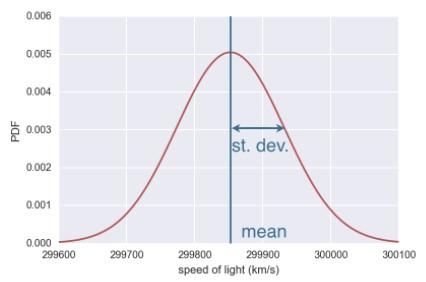

In [8]:
## Hình minh họa Image(fig1, height, width)

> Note that the mean and standard deviation are the names of the parameters of the Normal distribution.

> Do not confuse these with the mean and standard deviation that we computed directly from the data when doing exploratory data analysis. I know that nomenclature is confusing, but it is important to keep straight.

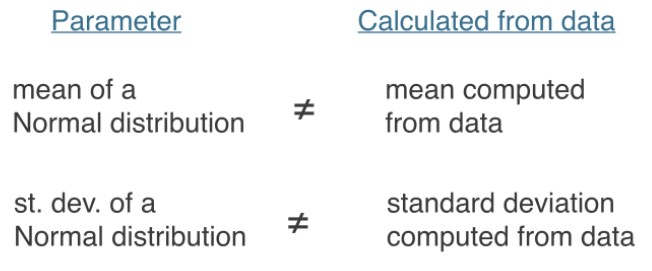

In [9]:
## Hình minh họa Image(fig1, height, width)

#### Comparing data to a Normal PDF
Now, if we add a histogram of the `Michelson measurements`, we see that the measured speed of light in air looks to be `Normally distributed`. 

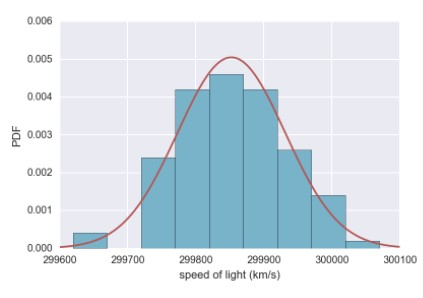

In [10]:
## Hình minh họa Image(fig1, height, width)

- Comparing the `histogram` to the `PDF` suffers from binning bias, so it is better to compare the `ECDF` of the data to the theoretical `CDF` of the `Normal distribution`. 

In [11]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

- To compute the theoretical `CDF`, we can use `np.random.normal` to draw samples and then we can compute the `CDF`.

In [12]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'../input/think-stats-dataset/Speed of light.txt')
speed = df['velocity of light in air (km/s)'].values
mean = np.mean(speed)
std = np.std(speed)
samples = np.random.normal(mean, std, size = 10000)
x_emp, y_emp = ecdf(speed)
x_thr, y_thr = ecdf(samples)

#### Checking Normality of Michelson data
As was the case with sampling out of the binomial distribution, we need to provide parameters, in this case the mean and standard deviation, to parametrize the Normal distribution we are sampling out of. 
- The mean and standard deviations computed from the data are good estimates, so we'll compute them and pass them into np dot random dot normal to take our samples. 
- We then use the function we already wrote to compute the ECDFs of the data and of the Normally distributed theoretical samples we just drew.

Finally, we plot the theoretical and empirical CDFs on the same plot.

With the absence of binning bias, it is much clearer that the Michelson data are approximately Normally distributed.

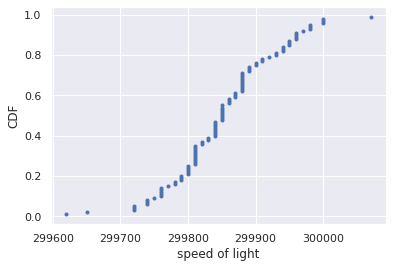

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
_ = plt.plot(x_emp, y_emp, marker = '.', linestyle = 'none')
_ = plt.plot(x_thr, y_thr)
_ = plt.xlabel('speed of light')
_ = plt.ylabel('CDF')
plt.show()

### 2.2. PRACTICES
#### Exercise 2.2.1. The Normal PDF
In this exercise, you will explore the `Normal PDF` and also learn a way to plot a `PDF` of a known distribution using hacker statistics. Specifically, you will plot a `Normal PDF` for various values of the `variance`.
#### SOLUTION.

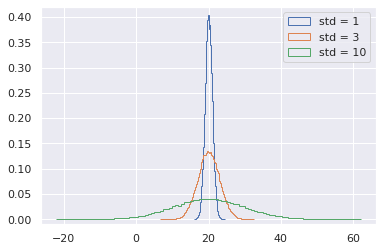

In [14]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size = 100000)
samples_std3 = np.random.normal(20, 3, size = 100000)
samples_std10 = np.random.normal(20, 10, size = 100000)

# Make histograms
_ = plt.hist(samples_std1, bins = 100 , density = True , histtype = 'step')
_ = plt.hist(samples_std3, bins = 100 , density = True , histtype = 'step')
_ = plt.hist(samples_std10, bins = 100 , density = True , histtype = 'step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

#### Exercise 2.2.2. The Normal CDF
Now that you have a feel for how the Normal PDF looks, let's consider its `CDF`. Using the samples you generated in the last exercise (in your namespace as `samples_std1`, `samples_std3`, and `samples_std10`), generate and plot the `CDFs`.
#### SOLUTION.

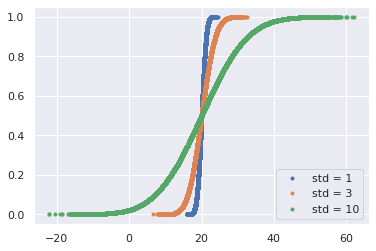

In [15]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)
# Plot CDFs
_ = plt.plot(x_std1, y_std1, marker = '.', linestyle = 'none')
_ = plt.plot(x_std3, y_std3, marker = '.', linestyle = 'none')
_ = plt.plot(x_std10, y_std10, marker = '.', linestyle = 'none')
# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

## 3. The Normal distribution: Properties and warnings
### 3.1. Theory.
The man pictured on this bill is Karl Gauss, one of the greatest mathematicians of all time. Clearly, the Germans think highly of Gauss to put him on their currency.

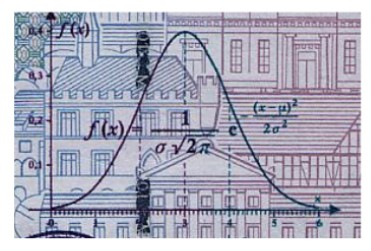

In [16]:
## Hình minh họa Image(fig1, height, width)

#### The Gaussian distribution
If we zoom in to the center of the bill, we see which of Gauss's barrel full of accomplishments they think most highly of. There it is, the Normal distribution!

It is often also called the Gaussian distribution, after its inventor, so you will often hear it referred to this way. So, yes, the Normal distribution is very important and very widely used. It is so prevalent, it is worth talking about some more. In practice, it is used to describe most symmetric peaked data you will encounter. Furthermore, for many of the statistical procedures you have heard of, Normality assumptions about the data are present. Indeed, it is a very powerful distribution that seems to be ubiquitous in nature, not just in the field of statistics. That said, there are important caveats about the distribution and we need to be careful when using it. First off, often times things you may think are Normally distributed are not.

#### Length of MA large mouth bass
Consider for example large mouth bass in Massachusetts lakes measured in 1994 and 1995 by the Massachusetts Department of Environmental Protection. If we look at a histogram of the length of the 316 fish they measured, they appear to be Normally distributed. 

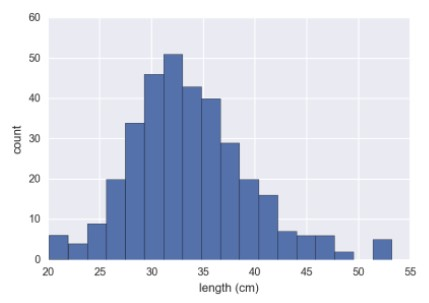

In [17]:
## Hình minh họa Image(fig1, height, width)

Indeed, when we look at the ECDF overlayed with a theoretical Normal CDF, the measurements look close to Normally distributed. There are some systematic differences, though, especially on the left tail. So this is not quite a Normal distribution, but we might not be making too big of an error by treating it as so.

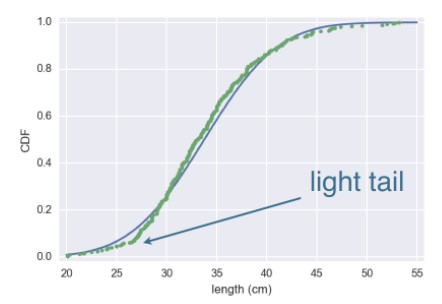

In [18]:
## Hình minh họa Image(fig1, height, width)

#### Mass of MA large mouth bass
Now, let's consider the mass of the bass. One might think that since the length of these bass is close to Normally distributed, the mass should be also. When we overlay the theoretical Normal CDF on the ECDF of the data, it is not even close. Seeing this immediately shows us that our initial thought was incorrect.

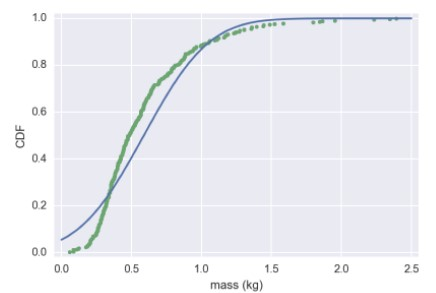

In [19]:
## Hình minh họa Image(fig1, height, width)

#### Light tails of the Normal distribution
Another important issue to keep in mind when using the Normal distribution is the lightness of its tails. If we look at the Normal distribution, the probability of being more than four standard deviations from the mean is very small. This means that when you are modeling data as Normally distributed, outliers are extremely unlikely. Real data sets often have extreme values, and when this happens, the Normal distribution might not be the best description of your data.

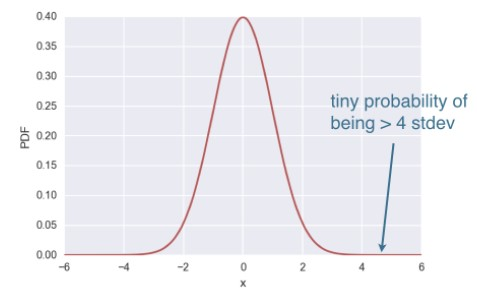

In [20]:
## Hình minh họa Image(fig1, height, width)

### 3.2. PRACTICES.
#### Exercise 3.2.1. Gauss and the 10 Deutschmark banknote
What are the mean and standard deviation, respectively, of the Normal distribution that was on the 10 Deutschmark banknote (the first image in this section [3])?
>- A. mean = 3, std = 1
>- B. mean = 3, std = 2
>- C. mean = 0.4, std = 1
>- D. mean = 0.6, std = 6

#### Answers
>- A. **Correct!!**
>- B. Incorrect. Remember that the standard deviation is about half the width of the PDF.
>- C. Incorrect. Remember that the mean of a Normal distribution is not the maximal value of the PDF, but the location of the maximum along the x-axis.
>- D. Incorrect. Remember that the mean of a Normal distribution is not the maximal value of the PDF, but the location of the maximum along the x-axis. Also, the standard deviation is about half the width of the PDF about 2/3 the way up to the peak.

#### Exercise 3.2.2. Are the Belmont Stakes results Normally distributed?
Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the fastest Belmont Stakes in history in 1973.

While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. With these two outliers removed from the data set, compute the mean and standard deviation of the Belmont winners' times. Sample out of a Normal distribution with this mean and standard deviation using the `np.random.normal()` function and plot a CDF. Overlay the `ECDF` from the winning Belmont times. Are these close to Normally distributed?

#### SOLUTION
- **Step 1.** Loading and viewing dataset

In [21]:
df_b = pd.read_table(r'../input/think-stats-dataset/Belmont Stakes.txt', sep = ',') 
df_b.head(2)

,Year,Winner,Jockey,Trainer,Owner,Time,Track,miles
0,2016,Creator,"Irad Ortiz, Jr",Steve Asmussen,WinStar Farm LLC,2:28.51,Belmont,1.5
1,2015,American Pharoah,Victor Espinoza,Bob Baffert,"Zayat Stables, LLC",2:26.65,Belmont,1.5


- **Step 2.** Examine type of the `Time`in your dataset.

In [22]:
df_b[['Time']].values[1]

array(['2:26.65'], dtype=object)

- **Step 3.** Convert to `float`

In [23]:
belmont_no_outliers = df_b['Time'].apply(lambda x: 60*int(x[0]) + int(x[2:4]) + int(x[-2:]) / 100 ); 
belmont_no_outliers.head(2)

0    148.51
1    146.65
Name: Time, dtype: float64

- **Step 4.** Plot the `cdf`

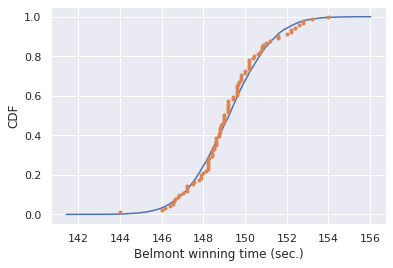

In [24]:
 # Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size = 10000)

# Get the CDF of the samples and of the data
x, y = ecdf(belmont_no_outliers)
x_theor, y_theor = ecdf(samples)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

#### Exercise 3.2.3. What are the chances of a horse matching or beating Secretariat's record?
Assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), what is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?
#### SOLUTION

In [25]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144) / len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.001536


## 4. The Exponential distribution
Just as there are many named discrete distribution, there are many named continuous distributions as well. 

For example, let's take a another trip to Poissonville and stand at a bus stop. We know that the number of buses that will arrive per hour are `Poisson distributed`. But the amount of time between arrivals of buses is `Exponentially distributed`.
### 4.1. Theory.
#### The Exponential distribution
The Exponential distribution has this story: the waiting time between arrivals of a `Poisson process` are `exponentially distributed`. 

$$ P[\text{Exp}(\lambda) < x] = \lambda e^{-\lambda x} $$

It has a single parameter, the mean waiting time. This distribution is not peaked, as we can see from its PDF

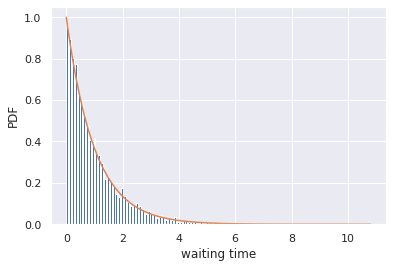

In [26]:
samp = np.random.exponential(1, size = 10000)
samp.sort()
x = np.linspace(min(samp), max(samp), 1000)
y = np.exp(-x)
_ = plt.hist(samp, bins = 200, density = True)
_ = plt.plot(x, y)
_ = plt.xlabel('waiting time')
_ = plt.ylabel('PDF')
plt.show()

#### Possible Poisson process
As an example, we can look at the time between all incidents involving nuclear power since 1974. We might expect incidents to be well-modeled by a Poisson process, ie, the timing of one incident is independent of all others. So, the time between incidents should be Exponentially distributed.

#### Exponential inter-incident times
We can compute and plot the CDF we would expect based on the mean time between incidents and overlay that with the ECDF from the real data. We take our usual approach where we draw many samples out of the Exponential distribution, using the mean inter-incident time as the parameter. We make the plot and label the axes.

We see that it is close to being Exponentially distributed, indicating the nuclear incidents can indeed be modeled as a Poisson process. The Exponential and Normal are just two of many examples of continuous distributions. Importantly, in many cases you can just simulate your story to get the CDF. Remember, you have the power of a computer. If you can simulate a story, you can get its distribution!

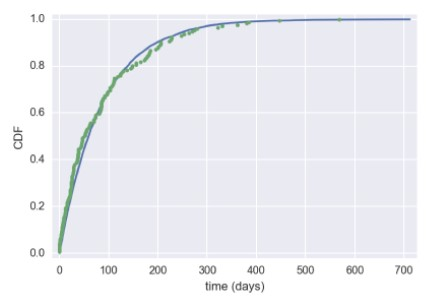

In [27]:
## Hình minh họa Image(fig1, height, width)

### 4.2. PRACTICES
#### Exercise 4.2.1. Matching a story and a distribution
How might we expect the time between Major League no-hitters to be distributed? Be careful here: a few exercises ago, we considered the probability distribution for the number of no-hitters in a season. Now, we are looking at the probability distribution of the time between no hitters.
>- A. Normal
>- B. Exponential
>- C. Poisson
>- D. Uniform
#### Answers 
>- A. Incorrect!! This might be your natural inclination, but one of the other options has a story that exactly matches the time interval between events that can be modeled a Poisson processes.
>- **B. Correct!!**
>- C. Incorrect! The Poisson distribution has the wrong story: it is the number of no-hitters in a given time interval, not the time between no-hitters.
>- D. Incorrect! This implies that any time interval is equally likely. But how would we specify the cutoff time? It doesn't make sense.

#### Exercise 4.2.2. Waiting for the next Secretariat
Unfortunately, Justin was not alive when Secretariat ran the Belmont in 1973. Do you think he will get to see a performance like that? To answer this, you are interested in how many years you would expect to wait until you see another performance like Secretariat's. How is the waiting time until the next performance as good or better than Secretariat's distributed? Choose the best answer.

>- A. Normal, because the distribution of Belmont winning times are Normally distributed.
>- B. Normal, because there is a most-expected waiting time, so there should be a single peak to the distribution.
>- C. Exponential: It is very unlikely for a horse to be faster than Secretariat, so the distribution should decay away to zero for high waiting time.
>- D. Exponential: A horse as fast as Secretariat is a rare event, which can be modeled as a Poisson process, and the waiting time between arrivals of a Poisson process is Exponentially distributed.
#### SOLUTION
>- A. Incorrect. Yes, the Belmont winning times are Normally distributed, but does the time between the extreme event of an ultra-fast horse match the story of the Normal distribution?
>- B. Incorrect. Just because there is a most-expected waiting time does not mean there is a peak. Remember, zero is the most probable value to draw out of an Exponential distribution, but it has no peak.
>- C. Incorrect. Do not think of the shape of the distribution, think of the story behind it and try to match the story of waiting for Secretariat with a story of a named distribution.
>- **D. Correct!** The Exponential distribution describes the waiting times between rare events, and Secretariat is rare!

#### Exercise 4.2.3. If you have a story, you can simulate it!
Sometimes, the story describing our probability distribution does not have a named distribution to go along with it. In these cases, fear not! You can always simulate it. We'll do that in this and the next exercise.

In earlier exercises, we looked at the rare event of no-hitters in Major League Baseball. Hitting the cycle is another rare baseball event. When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. Like no-hitters, this can be modeled as a `Poisson` process, so the time between hits of the cycle are also `Exponentially distributed`.

How long must we wait to see both a `no-hitter` and then a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes? The total waiting time is the time waited for the `no-hitter`, plus the time waited for the hitting the cycle.
#### SOLUTION.

In [28]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size = size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size = size)

    return t1 + t2

#### Exercise 4.2.4. Distribution of no-hitters and cycles
Now, you'll use your sampling function to compute the waiting time to observe a no-hitter and hitting of the cycle. The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.
#### SOLUTION.

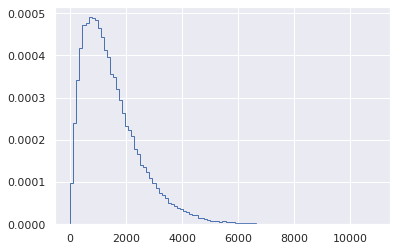

In [29]:
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764, 715, 100000)

# Make the histogram
_ = plt.hist(waiting_times, bins = 100, density = True, histtype = 'step')

# Label axes
_ = plt.xlabel('')
_ = plt.ylabel('')

# Show the plot
plt.show()